In [1]:
import os as os
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import boto3
s3 = boto3.resource('s3')
# Print out bucket names
bucket=s3.Bucket('npfiles-rank-estimation')
for object in bucket.objects.all():
    bucket.download_file(object.key, f"./np_files/{object.key}")

In [2]:

svds=[]
eigenvalues_all=[]
ranks=[]
for i in range(32):
    svds.append(np.load("np_files/svd_block"+str(i)+".npy"))
    eigenvalues_all.append(np.load("np_files/eigenvalues_block"+str(i)+".npy"))
    with open("np_files/rank_block"+str(i)+".txt") as f:
        ranks.append(int(f.readline()))

In [3]:

xmax=np.max([np.max(s) for s in svds])
xmin=np.min([np.min(s) for s in svds])

def fig_svd(n):
    svd=svds[n]
    plt.figure()
    plt.hist(svd,bins=100)
    plt.xlim(xmin,xmax)
    plt.show()

def fig_eig(n):
    eigenvalues=eigenvalues_all[n]
    x=eigenvalues.real
    y=eigenvalues.imag
    plt.figure()
    plt.scatter(x,y,alpha=0.2)
    plt.title("Eigenvalues for block "+str(n))
    plt.axis('equal')
    plt.show()

interact(fig_svd,n=IntSlider(min=0,max=len(svds)-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=31), Output()), _dom_classes=('widget-interact',…

<function __main__.fig_svd(n)>

In [4]:
interact(fig_eig,n=IntSlider(min=0,max=len(svds)-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=31), Output()), _dom_classes=('widget-interact',…

<function __main__.fig_eig(n)>

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

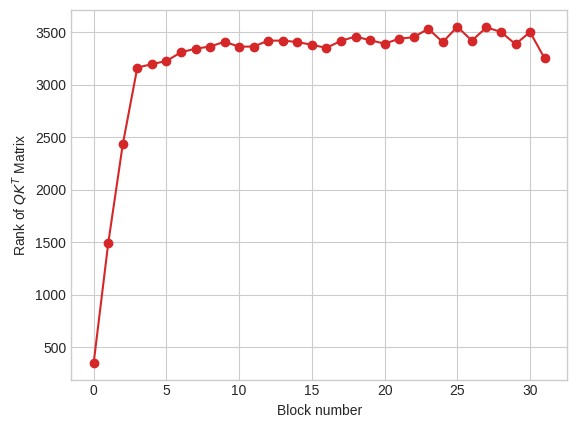

In [16]:
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
L=sns.color_palette("tab10")
color=L[3]
plt.figure()
plt.plot(ranks,"-o",color=color)
plt.xlabel("Block number")
plt.ylabel("Rank of $QK^T$ Matrix")
plt.savefig("figures/rank_plot.eps")
plt.show()

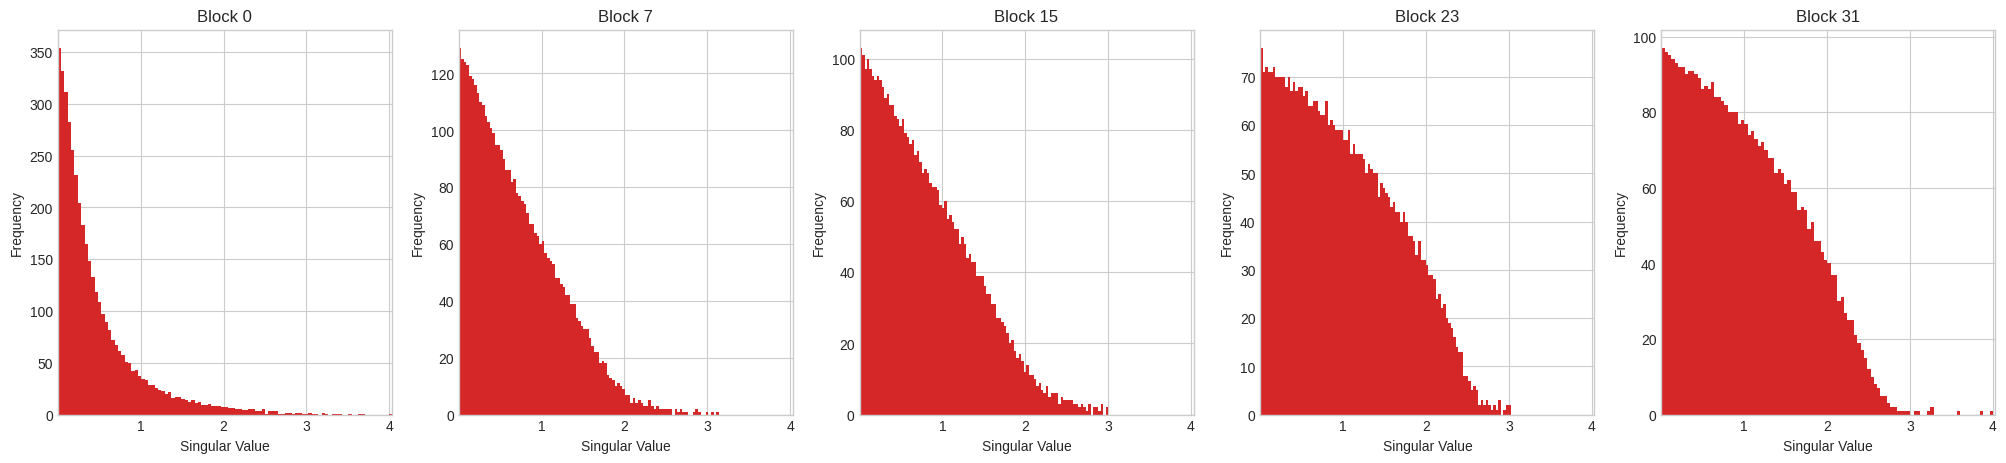

In [17]:
inds=[i*(len(svds)-1)//4 for i in range(5)]
xmin=np.min([np.min(svds[ind]) for ind in inds])
xmax=np.max([np.max(svds[ind]) for ind in inds])
for ind in inds:
    svd=svds[ind]
    fig,ax=plt.subplots(figsize=(10,10))
    ax.hist(svd,bins=100,color=color)
    ax.set_xlim(xmin,xmax)
    ax.set_xlabel("Singular Value")
    ax.set_ylabel("Frequency")
    plt.savefig(f"figures/svd_histograms{ind}.eps",bbox_inches='tight')
    plt.show()


In [ ]:
len(svds)

32

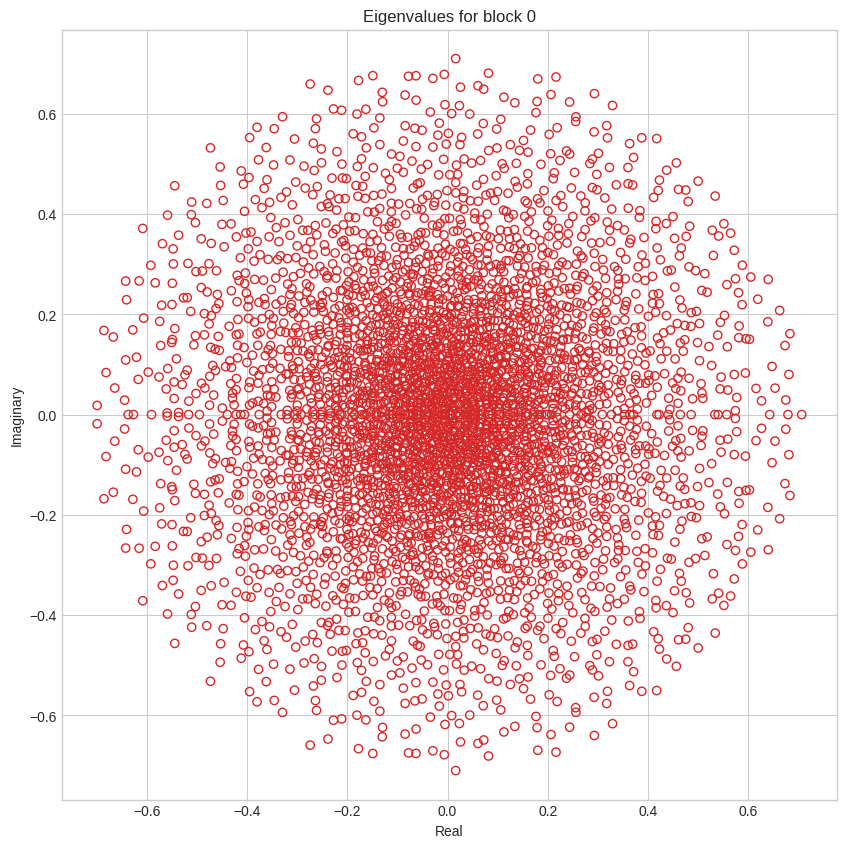

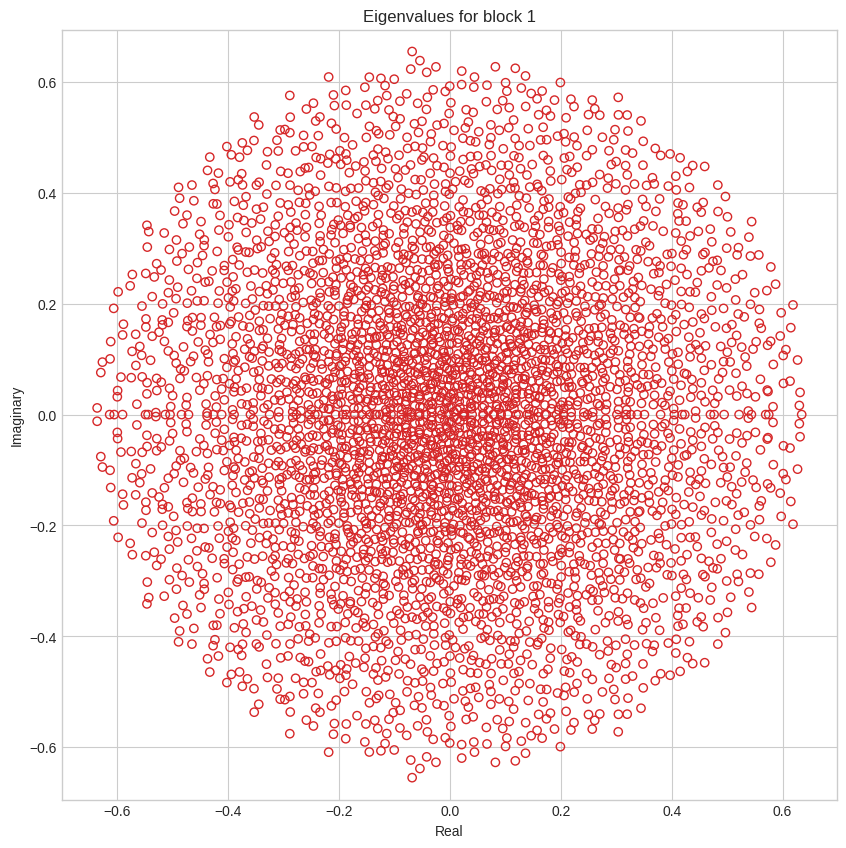

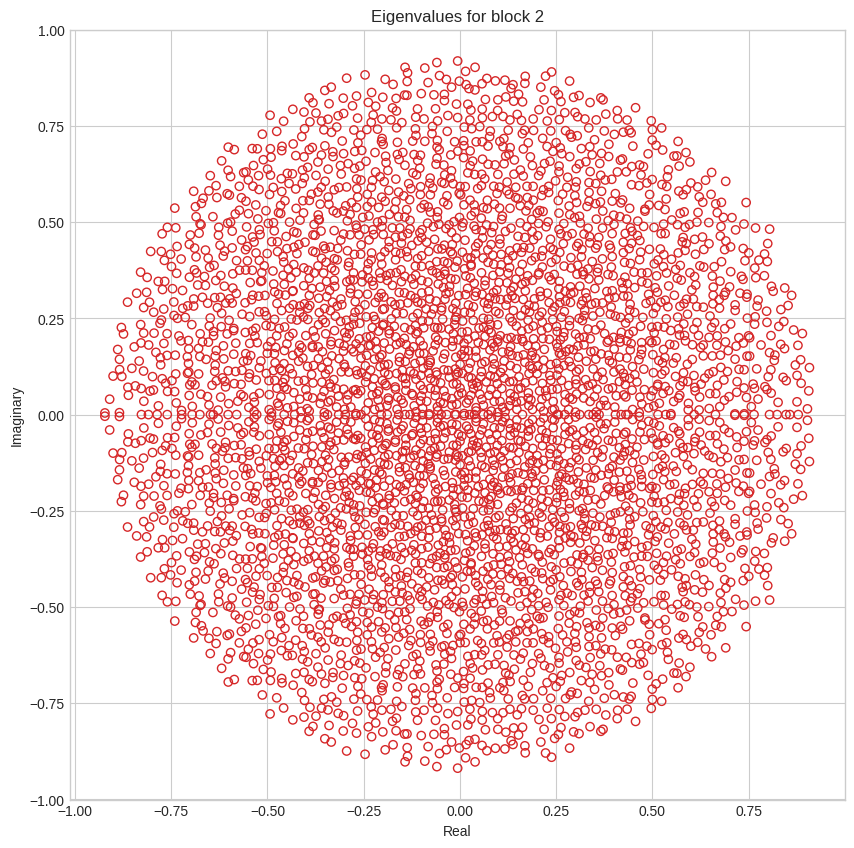

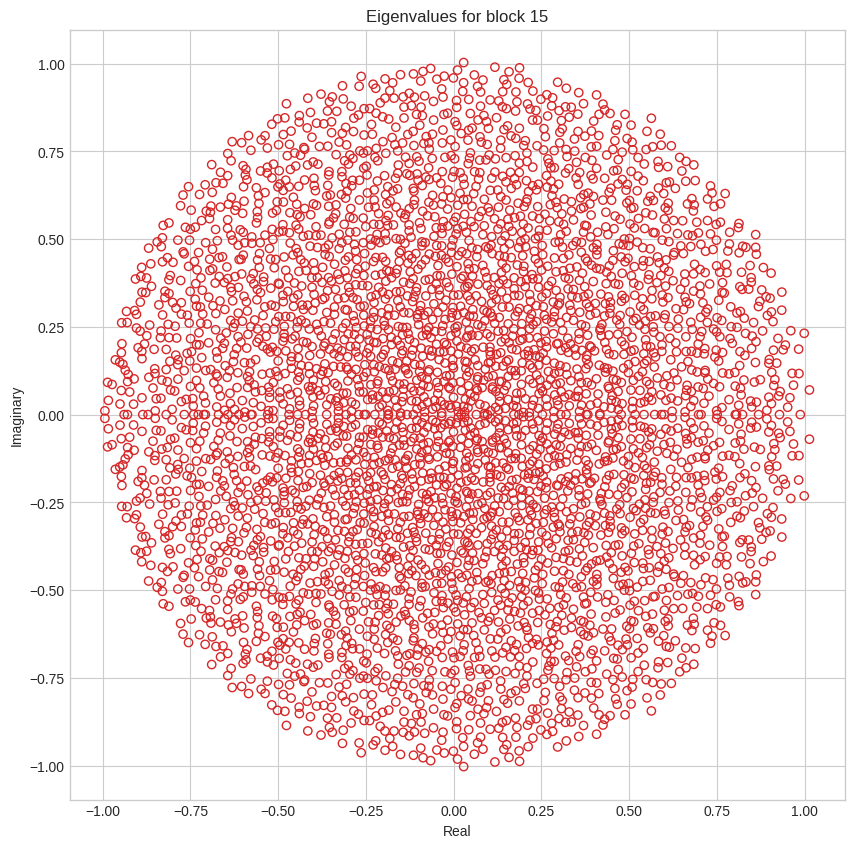

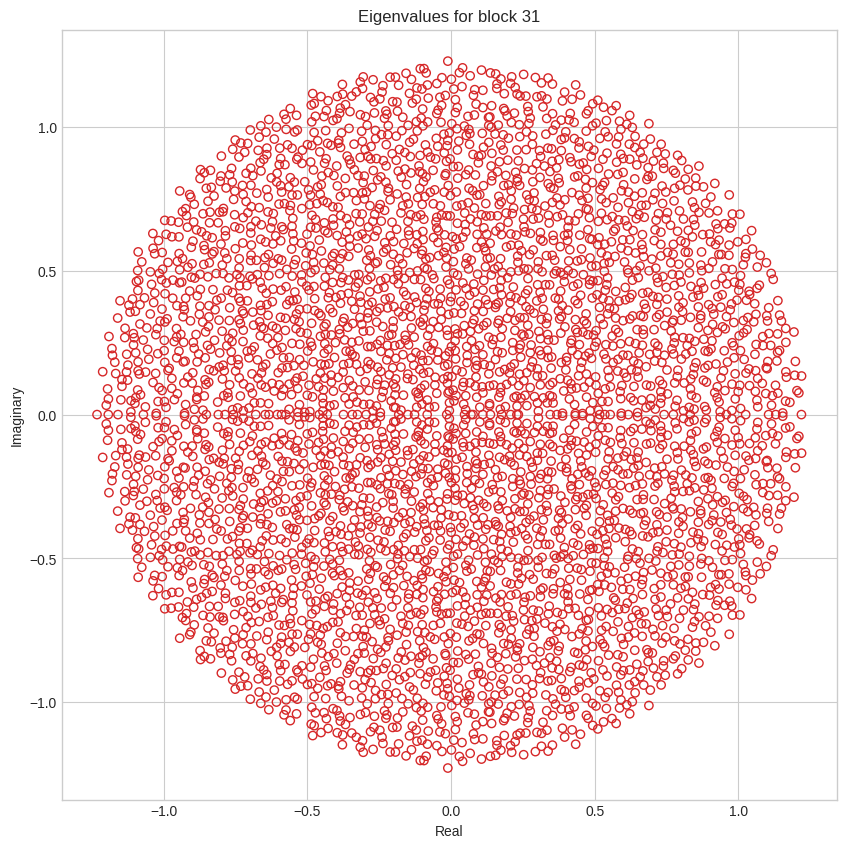

In [20]:
inds=[0,1,2,15,31]
for ind in inds:
    eigenvalues=eigenvalues_all[ind]
    x=eigenvalues.real
    y=eigenvalues.imag
    fig,ax=plt.subplots(figsize=(10,10))
    ax.scatter(x,y,facecolors='none', edgecolors=color)
    # ax.set_title("Eigenvalues for block "+str(ind))
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginary")
    ax.axis('equal')
    plt.savefig(f"figures/eigenvalues_{ind}.eps",bbox_inches='tight')
    plt.show()